In [14]:
# 필요패키지 import
import numpy as np
import pandas as pd
from datetime import datetime
import csv # csv 파일 저장
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [15]:
# 한글폰트 사용
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    f_path = '/Library/Fonts/Arial Unicode.ttf'
elif platform.system() == 'Windows':
    f_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

print('Hangul font is set!')

Hangul font is set!


In [16]:
# 개별 종목별 특허 건수

# 2차전지 특허 csv 파일 불러오기
df_1 = pd.read_csv('./new_secondary_cell_pluscode_wonoise_re.csv', engine='python')
df_1

,순서,출원번호,출원일자,출원년월,출원인,발명의명칭,공고일자,공개일자,등록일자,발명자,요약,종목코드
0,1,10-2017-0149717,2017-11-10,2017-11,주식회사 디에이테크놀로지(경기도 화성시 ...),이차전지 셀의 전극리드 성형장치(Lead Bending Machine for Sec...,2019.09.09,2019.05.20,2019.09.03,정영태(경기도 화성시 ...),본 발명은 이차전지의 제조 과정에서 전극조립체의 전극리드를 Z 형태로 2단으로 절곡...,A196490
1,2,10-2018-0092270,2018-08-08,2018-08,주식회사 엘지에너지솔루션(서울특별시 영등포구...),발광물질을 포함하는 리드필름을 구비한 이차전지 및 이차전지의 불량 검사 방법(Sec...,NaN,2020.02.18,NaN,황조연(대전광역시 유성구...),"양극과 음극 사이에 분리막이 개재되어 있는 구조의 전극조립체, 상기 전극조립체의 장...",A051910
2,3,10-2018-0048098,2018-04-25,2018-04,주식회사 엘지에너지솔루션(서울특별시 영등포구...),이차 전지 정압 지그 및 이를 이용한 이차 전지 내부 압력 조절 방법(SECONDA...,2021.06.07,2019.11.04,2021.05.31,윤종건(대전광역시 유성구...)|하회진(대전광역시 유성구...)|이정범(대전광역시 ...,본 발명의 일 실시예에 따른 이차 전지 정압 지그는 전지셀의 양면에 배치되어 상기 ...,A051910
3,14,10-2005-0032926,2005-04-20,2005-04,주식회사 엘지화학(서울특별시 영등포구...),압전 센서가 내장된 이차전지 모듈(Secondary Battery Module Ha...,2009.03.17,2006.10.25,2009.03.11,윤여원(대전광역시 서구...)|정도양(경기도 화성시 ...),"본 발명은 다수의 단위전지가 적층되어 있는 이차전지 모듈에 있어서, 방열을 위한 유...",A051910
4,15,10-2014-0001124,2014-01-06,2014-01,주식회사 엘지화학(서울특별시 영등포구...),금속 코팅된 고분자 집전체를 갖는 케이블형 이차전지(Cable Type Second...,2015.06.22,2014.02.24,2015.06.16,권요한(대전광역시 유성구...)|김기태(대전광역시 유성구...)|김제영(대전광역시 ...,본 발명은 소정 형상의 수평 단면을 가지는 집전체 및 상기 집전체의 표면에 형성된 ...,A051910
...,...,...,...,...,...,...,...,...,...,...,...,...
16832,3247,10-2010-0026181,2010-03-24,2010-03,삼화콘덴서공업주식회사(경기도 용인시 처인구...),전기화학 커패시터용 망간산화물 나노 입자 제조방법(Method for prepari...,2012.11.07,2011.09.30,2012.10.31,오영주(서울특별시 서초구...)|윤중락(경기 용인시 처인구...)|이종협(서울특별시...,본 발명은 상온에서 pH(hydrogen exponent) 조절만을 통하여 높은 정...,A001820
16833,3351,10-2009-0082291,2009-09-02,2009-09,에스케이이노베이션 주식회사(서울특별시 종로구...),에틸렌 공중합체 및 이의 제조방법(Ethylene copolymer and a me...,2012.06.05,2010.03.22,2012.05.25,신대호(대전광역시 유성구...)|심춘식(대전광역시 유성구...)|정지수(대전광역시 ...,"본 발명은 에틸렌 공중합체 및 이의 제조방법에 관한 것으로, 구체적으로는 직렬 또는...",A096770
16834,3589,10-2007-0104105,2007-10-16,2007-10,에스케이이노베이션 주식회사(서울특별시 종로구...) and 한국과학기술원(대전광역시...,전압 센서와 전하 균일 장치가 결합된 배터리 운용 시스템(Battery Manage...,2012.01.25,2009.04.21,2012.01.13,문건우(대전광역시 유성구...)|박홍선(대전광역시 유성구...)|김철호(대전광역시 ...,본 발명의 배터리 운용 장치는 직렬 연결된 복수개의 배터리로 구성된 배터리 모듈; ...,A096770
16835,3592,10-2007-0096477,2007-09-21,2007-09,주식회사 엘지화학(서울특별시 영등포구...),광학필름 및 이의 제조방법(OPTICAL FILMS AND METHOD FOR FA...,2011.01.19,2009.03.25,2011.01.13,강병일(대전 유성구...)|한창훈(대전 유성구...)|이대우(부산 사하구...)|서...,"본 발명은 i) 아크릴계 수지, 및 ii) 코어-쉘 타입의 그라프트 공중합체로서, ...",A051910


In [17]:
# 종목코드 별 특허건 수 
df_2 = df_1['종목코드'].value_counts()[::-1]

# 데이터 프레임으로 변경
df_2 = pd.DataFrame(df_2)

# index 재설정
df_2.reset_index(inplace=True)

# 컬럼명 변경
df_2 = df_2.rename(columns={'index':'종목코드', '종목코드':'특허수'})

# iloc를 통한 메인 브랜드 특허건 수 출력
df_2 = df_2.iloc[[39,40,41,42]]
df_2

,종목코드,특허수
39,A005490,307
40,A096770,819
41,A006400,4079
42,A051910,10983


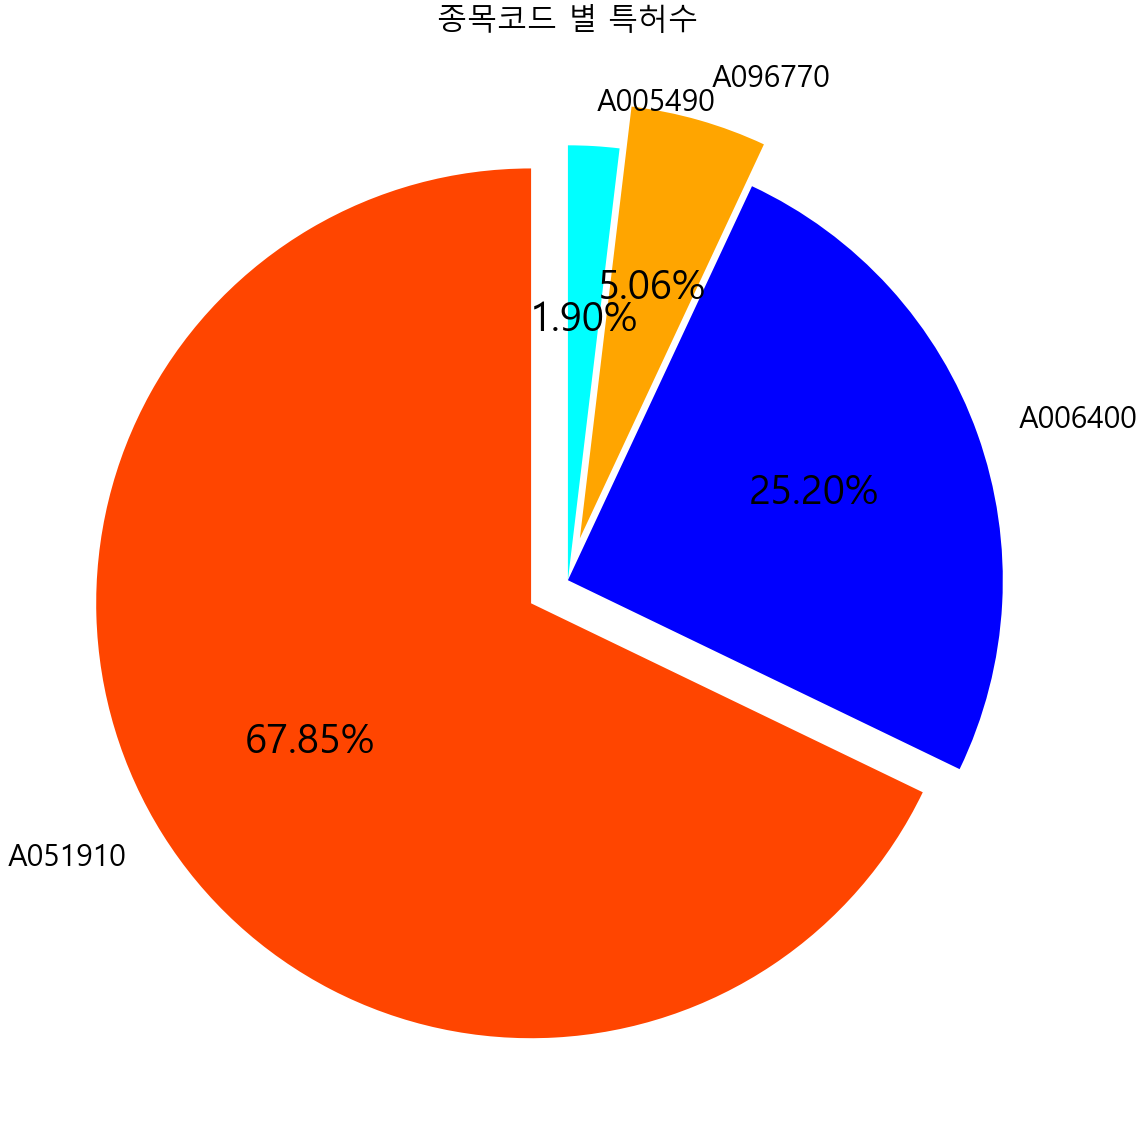

In [18]:
# 시각화 (종목코드 별 특허수)
fig = plt.figure(figsize = (20, 20))
ratio = df_2['특허수']
labels = df_2['종목코드']
# 파이 차트 분리
explode = [0, 0.10, 0, 0.10]
# 포스코, SK이노베이션, 삼성SDI, LG화학 순으로 색 지정.
colors = ['aqua', 'orange', 'blue', 'orangered']


patches, texts, autotexts = plt.pie(ratio, 
                                    labels=labels,  
                                    autopct='%1.2f%%',
                                    counterclock=False,
                                    explode=explode,
                                    colors=colors,
                                    startangle=90)
# 차트 타이틀 설정
plt.title('종목코드 별 특허수', fontsize=30)

# label 텍스트에 대한 스타일 적용
for t in texts:
    t.set_fontsize(30)
    t.set_color('black')
    
# pie 위의 텍스트에 대한 스타일 적용
for t in autotexts:
    t.set_color("black")
    t.set_fontsize(40)
# plt.legend(patches, ratio.index, loc="best")
plt.show()
fig.savefig('./특허수 pie차트.png')